In [1]:
import structuralcodes.sections._geometry as geo
from structuralcodes.materials.concrete import ConcreteMC2010
from shapely import Polygon
from structuralcodes.materials.constitutive_laws import ElasticPlastic

mat1 = ConcreteMC2010(30)
mat2 = ConcreteMC2010(30)
matR = ElasticPlastic(210000, fy=391.3, Eh=0, eps_su = 0.04)

In [2]:
rec1 = Polygon(((-50,0),(50,0),(50,300),(-50,300)))
rec2 = Polygon(((-200,300),(200,300),(200,350),(-200,350)))
geom1 = geo.SurfaceGeometry(rec1, mat1)
geom2 = geo.SurfaceGeometry(rec2, mat2)


geomC = geom1 + geom2
# geomC = geo.CompoundGeometry([geom1,geom2])

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="300" height="300" viewBox="-216.0 -16.0 432.0 382.0" preserveAspectRatio="xMinYMin meet"><g transform="matrix(1,0,0,-1,0,350.0)"><g><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="2.88" opacity="0.6" d="M -50.0,0.0 L 50.0,0.0 L 50.0,300.0 L -50.0,300.0 L -50.0,0.0 z" /><path fill-rule="evenodd" fill="#ff3333" stroke="#555555" stroke-width="2.88" opacity="0.6" d="M -200.0,300.0 L 200.0,300.0 L 200.0,350.0 L -200.0,350.0 L -200.0,300.0 z" /></g></g></svg>


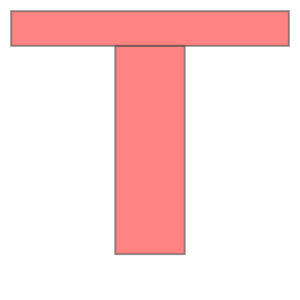

In [3]:
print(geomC._repr_svg_())
geomC

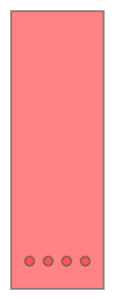

In [4]:
rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)))
#rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)),[[(-30,50),(-30,280),(30,280),(30,50)]]) # WITH HOLE
# rec = Polygon(((-50,0),(50,0),(50,300),(-50,300)),[[(-30,255),(-30,265),(30,265),(30,255)]]) # WITH SMALL HOLE
geom = geo.SurfaceGeometry(rec, mat1)
geomRC = geo.add_reinforcement(geom,(-30,30),9.9387229,matR)
geomRC = geo.add_reinforcement(geomRC,(-10,30),9.9387229,matR)
geomRC = geo.add_reinforcement(geomRC,(10,30),9.9387229,matR)
geomRC = geo.add_reinforcement(geomRC,(30,30),9.9387229,matR)
geomRC

In [5]:
geomRC.geometries[0].polygon.exterior.coords[:-1]

[(-50.0, 0.0), (50.0, 0.0), (50.0, 300.0), (-50.0, 300.0)]

In [6]:
geomRC.point_geometries[0]._point.coords[0]

(-30.0, 30.0)

Example translation

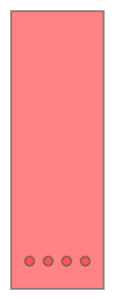

In [7]:
geomT = geomRC.translate(0,-150)
geomT

In [8]:
geomT.geometries[0].polygon.exterior.coords[:-1]

[(-50.0, -150.0), (50.0, -150.0), (50.0, 150.0), (-50.0, 150.0)]

In [9]:
geomT.point_geometries[0]._point.coords[0]

(-30.0, -120.0)

Example rotation

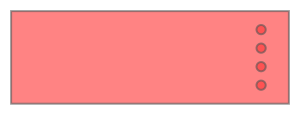

In [10]:
import numpy as np
geomR = geomT.rotate(np.pi/2)
geomR

In [11]:
geomR.geometries[0].polygon.exterior.coords[:-1]

[(150.0, -50.0), (150.0, 50.0), (-150.0, 50.0), (-150.0, -50.0)]

In [12]:
geomR.point_geometries[0]._point.coords[0]

(120.0, -30.0)

Example integration

In [13]:
from structuralcodes.sections._generic import GenericSection

sec = GenericSection(geomT, 'mySection')
sec.gross_properties

GrossProperties(area=30000.0, area_concrete=0, area_reinforcement=0, ea=0, mass=0, perimeter=0, sx=0, sy=0, cx=0, cy=0, i_yy=0, i_zz=0, i_yz=0, ei_xx=0, ei_yy=0)

In [14]:
from structuralcodes.sections._section_integrators import MarinIntegrator

integr = MarinIntegrator()
N, Mx, My = integr.integrate_strain_response_on_geometry(geo=sec.geometry,strain=[0.007, 7e-5,0])
print(N)
print(Mx)
print(My)


-0.00015637933393009007
-30260204.062867224
0.0


In [15]:
sec.section_analyzer.calculate_bending_strength(0,0)

UltimateBendingMomentResult(theta=0, n=0, m_x=-30260203.311229464, m_y=9.861682818004012e-09, chi_x=7.000000399708106e-05, chi_y=0, eps_a=0.00700000059956216)

In [16]:
sec.section_analyzer.calculate_bending_strength(0,-10000)

UltimateBendingMomentResult(theta=0, n=-10000, m_x=-31327110.62946214, m_y=-2.3344094253169953e-09, chi_x=6.467390844582313e-05, chi_y=0, eps_a=0.006201086266873471)

In [17]:
sec.section_analyzer.calculate_bending_strength(0,-50000)

UltimateBendingMomentResult(theta=0, n=-50000, m_x=-35252171.7349264, m_y=0.0, chi_x=4.9583332392589896e-05, chi_y=0, eps_a=0.0039374998588884835)

In [18]:
sec.section_analyzer.calculate_bending_strength(0,-89000)

UltimateBendingMomentResult(theta=0, n=-89000, m_x=-38551392.19640925, m_y=0.0, chi_x=4.039375412837501e-05, chi_y=0, eps_a=0.0025590631192562515)

In [19]:
sec.section_analyzer.calculate_bending_strength(0,-100000)

UltimateBendingMomentResult(theta=0, n=-100000, m_x=-39387737.84693159, m_y=-1.2613677721376827e-10, chi_x=3.838709579740511e-05, chi_y=0, eps_a=0.0022580643696107658)

In [20]:
sec.section_analyzer.calculate_bending_strength(0,-300000)

UltimateBendingMomentResult(theta=0, n=-300000, m_x=-47365987.55068138, m_y=4.501307954487393e-11, chi_x=2.0169491542853847e-05, chi_y=0, eps_a=-0.00047457626857192294)

In [21]:
sec.section_analyzer.calculate_bending_strength(0,-400000)

UltimateBendingMomentResult(theta=0, n=-400000, m_x=-42360423.54173112, m_y=-1.3836231046491488e-10, chi_x=1.7630340542915206e-05, chi_y=0, eps_a=-0.0008554489185627193)

In [22]:
sec.section_analyzer.calculate_bending_strength(0,-600000)

UltimateBendingMomentResult(theta=0, n=-600000, m_x=-29271757.5434513, m_y=-1.1479390399817168e-10, chi_x=1.3819531623840762e-05, chi_y=0, eps_a=-0.001427070256423886)

In [26]:
def myfun(a,b,**kwargs):
    print(a,b,kwargs)
    if 'mesh_size' in kwargs:
        print('mesh size given: {}'.format(kwargs.get('mesh_size')))
    if 'tri' in kwargs:
        print('Provided trinagulation, do NOT triangulate again')
    else:
        print('No triangulation provided, triangulate!')

myfun(2,3)
myfun(2,3,mesh_size = 10)

2 3 {}
No triangulation provided, triangulate!
2 3 {'mesh_size': 10}


TypeError: can only concatenate str (not "int") to str

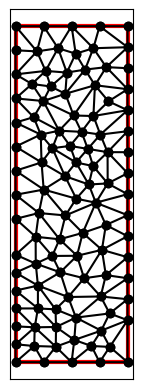

In [23]:
from structuralcodes.sections._section_integrators import FiberIntegrator
import triangle
import matplotlib.pyplot as plt

integr = FiberIntegrator()

pi = integr.prepare_input(geo=sec.geometry,strain=[0.007, 7e-5,0])
triangle.plot(plt.axes(),**pi[0])

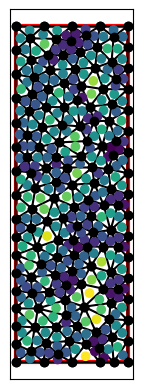

In [26]:
import triangle
import matplotlib.pyplot as plt
import numpy as np
tri = pi
# prepare regions
regions: list[list[float | int]] = []
regions.append([50,50,0,100])

#tri["regions"] = regions  # set regions

mesh = triangle.triangulate(tri,f'pq{10:.1f}Aao2')
mesh = triangle.triangulate(tri,f'pq{30:.1f}Aa50o1')
mesh = triangle.triangulate(tri,f'pq30a200.5o1')
triangle.plot(plt.axes(),**mesh)
fiber_pos = []
area = []
for t in mesh['triangles']:
    x = mesh['vertices'][t[0]][0] + mesh['vertices'][t[1]][0] + mesh['vertices'][t[2]][0]
    x /= 3.0
    y = mesh['vertices'][t[0]][1] + mesh['vertices'][t[1]][1] + mesh['vertices'][t[2]][1]
    y /= 3.0
    a = mesh['vertices'][t[0]][0] * mesh['vertices'][t[1]][1] - mesh['vertices'][t[0]][1] * mesh['vertices'][t[1]][0]
    a += mesh['vertices'][t[1]][0] * mesh['vertices'][t[2]][1] - mesh['vertices'][t[1]][1] * mesh['vertices'][t[2]][0]
    a += mesh['vertices'][t[2]][0] * mesh['vertices'][t[0]][1] - mesh['vertices'][t[2]][1] * mesh['vertices'][t[0]][0]
    a = abs(a) * 0.5
    fiber_pos.append([x,y])
    area.append(a)

fiber_pos = np.array(fiber_pos)
#fiber = {'vertices': fiber_pos}
#triangle.compare(plt, mesh, fiber)
plt.scatter(fiber_pos[:,0],fiber_pos[:,1],c=area)

vertices vertex_markers triangles segments segment_markers


True


(-5.0, 105.0, -15.0, 315.0)

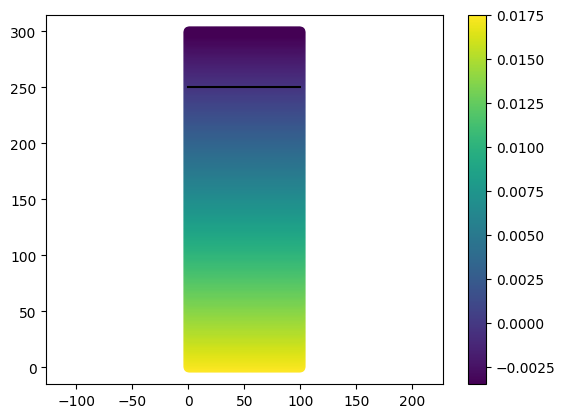

In [1]:
import numpy as np
import matplotlib.pyplot as plt
epsA = 0.007
epsA00 = 0.0175
kx = 7.0e-5
ky = 0

x = np.linspace(0,100,101)
y = np.linspace(0,300,301)
dx = (x[-1]-x[0])/(len(x)-1)
dy = (y[-1]-y[0])/(len(y)-1)

X,Y = np.meshgrid(x,y)


# strain = np.zeros_like(X)
xg = 50
yg = 150
# strain = epsA + (X-xg) * ky - (Y-yg) * kx # opt 1: epsA is in baricenter
strain = epsA00 + X * ky - Y * kx # opt 2 epsA is in 0,0 (more generic?)
# for i in range(len(x)):
#     for j in range(len(y)):
#         strain[j,i] = epsA + (X[j,i]-xg) * ky + (Y[j,i]-yg) * kx

# a + b*(x-xg) + c*(y-yg) = 0 y = (-a - b*(x-xg))/c + yg

def zero_strain(a,b,c,x):
    return -(-a - b*x)/c

y0 = zero_strain(epsA, ky, kx, (x-xg)) + yg # opt 1
y0 = zero_strain(epsA00, ky, kx, x) # opt 2
print(np.allclose(zero_strain(epsA, ky, kx, (x-xg)) + yg, zero_strain(epsA00, ky, kx, x)))
plt.scatter(X,Y,c = strain)
plt.plot(x,y0,'-k')
plt.colorbar()
plt.axis('equal')